In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
from datetime import datetime

In [2]:
df = pd.read_csv("april.csv")
df


,tanggal,waktu,ketinggian
0,01/04/2023,00:00:00,93
1,01/04/2023,01:00:00,129
2,01/04/2023,02:00:00,153
3,01/04/2023,03:00:00,160
4,01/04/2023,04:00:00,159
...,...,...,...
9428,30/04/2024,19:00:00,63
9429,30/04/2024,20:00:00,83
9430,30/04/2024,21:00:00,100
9431,30/04/2024,22:00:00,116


In [3]:
#ubah menjadi datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d/%m/%Y')
df['waktu'] = pd.to_datetime(df['waktu'], format='%H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9433 entries, 0 to 9432
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     9433 non-null   datetime64[ns]
 1   waktu       9433 non-null   object        
 2   ketinggian  9433 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 221.2+ KB


In [4]:
# gabung
df['waktu1'] = df.apply(lambda row: datetime.combine(row['tanggal'], row['waktu']), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9433 entries, 0 to 9432
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     9433 non-null   datetime64[ns]
 1   waktu       9433 non-null   object        
 2   ketinggian  9433 non-null   int64         
 3   waktu1      9433 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 294.9+ KB


In [5]:
# Menghapus kolom 'tanggal' dan 'waktu' yang lama
df.drop(columns=['tanggal', 'waktu'], inplace=True)
df

,ketinggian,waktu1
0,93,2023-04-01 00:00:00
1,129,2023-04-01 01:00:00
2,153,2023-04-01 02:00:00
3,160,2023-04-01 03:00:00
4,159,2023-04-01 04:00:00
...,...,...
9428,63,2024-04-30 19:00:00
9429,83,2024-04-30 20:00:00
9430,100,2024-04-30 21:00:00
9431,116,2024-04-30 22:00:00


In [6]:
#cek data hilang
df.isnull().sum()

ketinggian    0
waktu1        0
dtype: int64

<Axes: ylabel='ketinggian'>

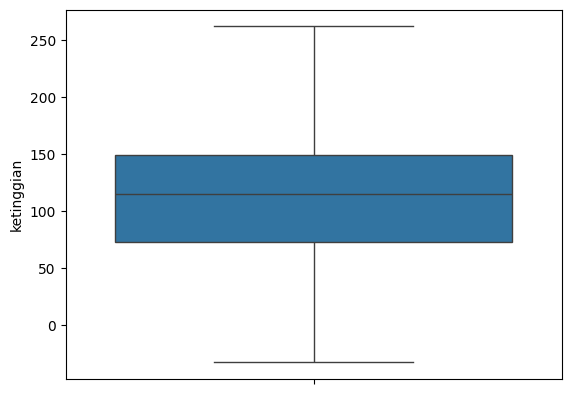

In [7]:
#cek outlier
import seaborn as sns
sns.boxplot(y=df['ketinggian'])

In [8]:
#normalisasi training dan testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['ketinggian'] = scaler.fit_transform(df[['ketinggian']])


In [9]:
# Mengubah nama kolom sesuai dengan format Prophet
df.rename(columns={'waktu1': 'ds', 'ketinggian': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
# hitung data training dengan data testing
utrain = int(len(df) * 0.8)
utest = len(df) - utrain
utrain

7546

In [11]:
# pisah data training dan data testing
train = df.iloc[:7546]
test = df.iloc[7546:]
test

,y,ds
7546,0.545763,2024-02-12 09:00:00
7547,0.498305,2024-02-12 10:00:00
7548,0.447458,2024-02-12 11:00:00
7549,0.433898,2024-02-12 12:00:00
7550,0.430508,2024-02-12 13:00:00
...,...,...
9428,0.325424,2024-04-30 19:00:00
9429,0.393220,2024-04-30 20:00:00
9430,0.450847,2024-04-30 21:00:00
9431,0.505085,2024-04-30 22:00:00


In [12]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [13]:
from prophet import Prophet

# Melatih model dengan data latih
model = Prophet()
model.fit(train)


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
11:36:34 - cmdstanpy - INFO - Chain [1] start processing
11:36:34 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Membuat dataframe untuk tanggal prediksi sesuai dengan data uji
future = model.make_future_dataframe(periods=len(test), freq='H')
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-01 00:00:00,0.513801,0.240896,0.703727,0.513801,0.513801,-0.030741,-0.030741,-0.030741,-0.032443,-0.032443,-0.032443,0.001702,0.001702,0.001702,0.0,0.0,0.0,0.483060
1,2023-04-01 01:00:00,0.513808,0.289352,0.765769,0.513808,0.513808,0.002429,0.002429,0.002429,0.000608,0.000608,0.000608,0.001822,0.001822,0.001822,0.0,0.0,0.0,0.516237
2,2023-04-01 02:00:00,0.513814,0.329394,0.774572,0.513814,0.513814,0.040165,0.040165,0.040165,0.038238,0.038238,0.038238,0.001927,0.001927,0.001927,0.0,0.0,0.0,0.553979
3,2023-04-01 03:00:00,0.513821,0.344126,0.796882,0.513821,0.513821,0.069325,0.069325,0.069325,0.067308,0.067308,0.067308,0.002017,0.002017,0.002017,0.0,0.0,0.0,0.583146
4,2023-04-01 04:00:00,0.513827,0.359128,0.827307,0.513827,0.513827,0.078661,0.078661,0.078661,0.076571,0.076571,0.076571,0.002091,0.002091,0.002091,0.0,0.0,0.0,0.592489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9428,2024-04-30 19:00:00,0.482203,0.264372,0.698787,0.475135,0.490320,0.013259,0.013259,0.013259,0.013916,0.013916,0.013916,-0.000657,-0.000657,-0.000657,0.0,0.0,0.0,0.495462
9429,2024-04-30 20:00:00,0.482209,0.239361,0.704636,0.475139,0.490337,-0.017027,-0.017027,-0.017027,-0.016472,-0.016472,-0.016472,-0.000555,-0.000555,-0.000555,0.0,0.0,0.0,0.465182
9430,2024-04-30 21:00:00,0.482215,0.214650,0.668255,0.475144,0.490354,-0.041057,-0.041057,-0.041057,-0.040612,-0.040612,-0.040612,-0.000445,-0.000445,-0.000445,0.0,0.0,0.0,0.441158
9431,2024-04-30 22:00:00,0.482221,0.181056,0.666063,0.475148,0.490371,-0.053986,-0.053986,-0.053986,-0.053660,-0.053660,-0.053660,-0.000326,-0.000326,-0.000326,0.0,0.0,0.0,0.428235


In [15]:
# Mengambil prediksi yang sesuai dengan periode data uji
predictions = forecast.iloc[-len(test):][['ds', 'yhat']].reset_index(drop=True)

In [28]:
test_data = test.reset_index(drop=True)
result = pd.concat([test_data, predictions['yhat']], axis=1)
result['yhat']

0       0.391906
1       0.382739
2       0.392570
3       0.419863
4       0.458868
          ...   
1882    0.495462
1883    0.465182
1884    0.441158
1885    0.428235
1886    0.430468
Name: yhat, Length: 1887, dtype: float64

In [17]:
#menghitung mae, mse, dan rmse

from sklearn import metrics
mae = metrics.mean_absolute_error(result['y'], result['yhat'])
mse = metrics.mean_squared_error(result['y'], result['yhat'])
rmse = np.sqrt(mse)

In [18]:
print (mae)
print (mse)
print (rmse)

0.14049380362269182
0.028249500446061337
0.1680758770498055


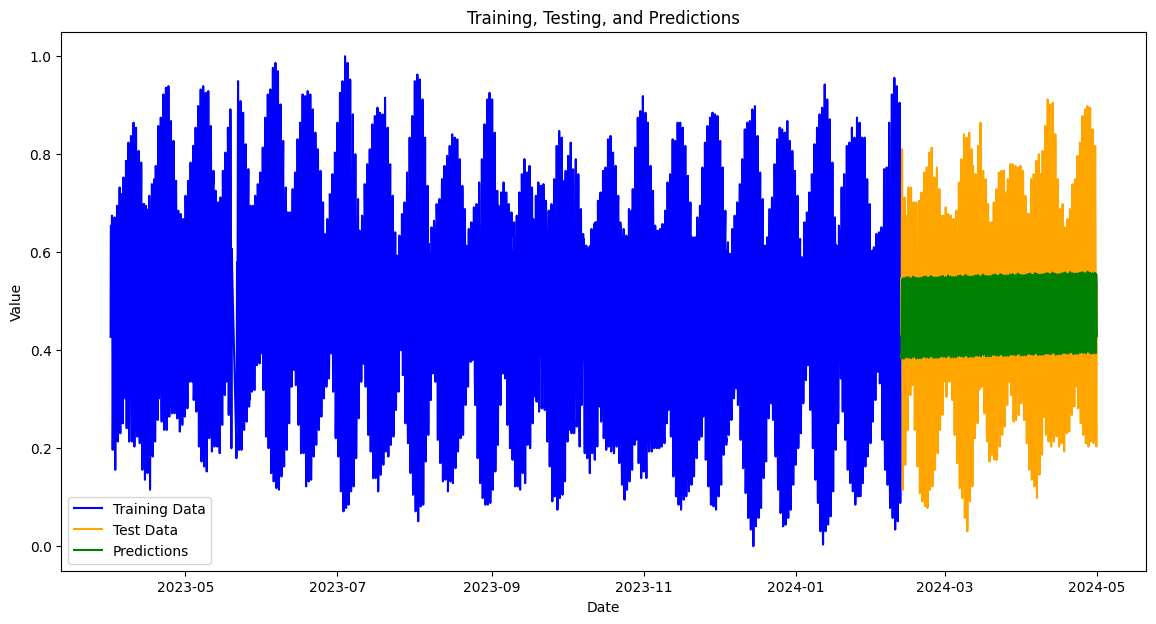

In [19]:
# Membuat grafik
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Plot data training
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')

# Plot data testing
plt.plot(test['ds'], test['y'], label='Test Data', color='orange')

# Plot hasil prediksi
plt.plot(predictions['ds'], predictions['yhat'], label='Predictions', color='green')

# Menambahkan judul dan label
plt.title('Training, Testing, and Predictions')
plt.xlabel('Date')
plt.ylabel('Value')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

In [20]:
trains = pd.DataFrame(train['y'].values, index=train['ds'], columns=['y'])
tests = pd.DataFrame(test['y'].values, index=test['ds'], columns=['y'])
result = pd.DataFrame(predictions['yhat'].values, index=predictions['ds'], columns=['yhat'])
result

,yhat
ds,
2024-02-12 09:00:00,0.391906
2024-02-12 10:00:00,0.382739
2024-02-12 11:00:00,0.392570
2024-02-12 12:00:00,0.419863
2024-02-12 13:00:00,0.458868
...,...
2024-04-30 19:00:00,0.495462
2024-04-30 20:00:00,0.465182
2024-04-30 21:00:00,0.441158


In [21]:
gabungan = pd.concat([trains, tests, result], axis=1)
gabungan.columns = ['Train', 'Test', 'Prediksi']
waktu = gabungan.reset_index()
waktu

,ds,Train,Test,Prediksi
0,2023-04-01 00:00:00,0.427119,NaN,NaN
1,2023-04-01 01:00:00,0.549153,NaN,NaN
2,2023-04-01 02:00:00,0.630508,NaN,NaN
3,2023-04-01 03:00:00,0.654237,NaN,NaN
4,2023-04-01 04:00:00,0.650847,NaN,NaN
...,...,...,...,...
9428,2024-04-30 19:00:00,NaN,0.325424,0.495462
9429,2024-04-30 20:00:00,NaN,0.393220,0.465182
9430,2024-04-30 21:00:00,NaN,0.450847,0.441158
9431,2024-04-30 22:00:00,NaN,0.505085,0.428235


In [25]:
future_dates = df.iloc[9432:9600]['ds']  # Indeks 200-210
future_df = pd.DataFrame({'ds': future_dates})
future_df

,ds
9432,2024-04-30 23:00:00


In [27]:
prediksi1minggu = model.predict(future_df)
prediksi1minggu

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-30 23:00:00,0.482227,0.201486,0.667719,0.482227,0.482227,-0.051759,-0.051759,-0.051759,-0.05156,-0.05156,-0.05156,-0.000199,-0.000199,-0.000199,0.0,0.0,0.0,0.430468


In [22]:

# Lakukan inverse transformasi pada kolom 'Train'
waktu['Train'] = scaler.inverse_transform(waktu[['Train']])

# Lakukan inverse transformasi pada kolom 'Test'
waktu['Test'] = scaler.inverse_transform(waktu[['Test']])

# Lakukan inverse transformasi pada kolom 'Prediksi'
waktu['Prediksi'] = scaler.inverse_transform(waktu[['Prediksi']])

# Tampilkan DataFrame hasil inverse transformasi
waktu


,ds,Train,Test,Prediksi
0,2023-04-01 00:00:00,93.0,NaN,NaN
1,2023-04-01 01:00:00,129.0,NaN,NaN
2,2023-04-01 02:00:00,153.0,NaN,NaN
3,2023-04-01 03:00:00,160.0,NaN,NaN
4,2023-04-01 04:00:00,159.0,NaN,NaN
...,...,...,...,...
9428,2024-04-30 19:00:00,NaN,63.0,113.161354
9429,2024-04-30 20:00:00,NaN,83.0,104.228641
9430,2024-04-30 21:00:00,NaN,100.0,97.141705
9431,2024-04-30 22:00:00,NaN,116.0,93.329382


In [23]:
waktu.to_csv('Prophet_tableau.csv', index=False)